# 导入数据集

In [ ]:
# https://tianchi.aliyun.com/competition/entrance/231522/information

In [244]:
road = r"E:\tianchi_fresh_comp_train_user.csv"

In [2]:
# 导入数据分析包
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# 解决可视化中的中文显示问题

sns.set(style = 'darkgrid',font_scale=1.5)

plt.rcParams['font.sans-serif'] = ['Simhei']
plt.rcParams['axes.unicode_minus'] = False

In [245]:
# 读取数据
data_user = pd.read_csv(road,dtype = str)  # 把所有数据转换成字符串类型
data_user.head(2)

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,10001082,285259775,1,97lk14c,4076,2014-12-08 18
1,10001082,4368907,1,NaN,5503,2014-12-12 12


In [246]:
data_user.info()
# 字段解释：
# user_id:               用户身份
# item_id:              商品ID
# behavior_type:        用户行为类型（点击、收藏、加购物车、支付---1，2，3，4表示）
# user_geohash:        地理位置
# item_category:       品类（商品所属的品类）
# time:                用户行为发生的时间

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23291027 entries, 0 to 23291026
Data columns (total 6 columns):
user_id          object
item_id          object
behavior_type    object
user_geohash     object
item_category    object
time             object
dtypes: object(6)
memory usage: 1.0+ GB


# 抽样数据集

In [247]:
data_user = data_user.sample(frac=0.1,replace=False)
data_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329103 entries, 4109695 to 23021688
Data columns (total 6 columns):
user_id          object
item_id          object
behavior_type    object
user_geohash     object
item_category    object
time             object
dtypes: object(6)
memory usage: 124.4+ MB


In [248]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
4109695,20268138,369172744,1,NaN,10529,2014-11-22 23
20368655,30995101,333248503,1,94h6ftp,3489,2014-12-11 21
120459,101760598,43745110,1,NaN,1838,2014-12-09 15
18077353,131920520,116754464,1,95u4ffa,5550,2014-12-09 21
4561784,25783120,235633043,1,99uji3w,9614,2014-12-06 15


In [250]:
sampledf = data_user.copy()
sampledf.head(2)

,user_id,item_id,behavior_type,user_geohash,item_category,time
4109695,20268138,369172744,1,NaN,10529,2014-11-22 23
20368655,30995101,333248503,1,94h6ftp,3489,2014-12-11 21


# 数据清洗

## 缺失值信息

In [8]:
data_user.isnull().sum()

user_id                0
item_id                0
behavior_type          0
user_geohash     1590611
item_category          0
time                   0
dtype: int64

In [9]:
data_user.apply(lambda x:sum(x.isnull())/len(x))
# 缺失占比达到68%，可删除处理或不运用到后期分析使用

user_id          0.000000
item_id          0.000000
behavior_type    0.000000
user_geohash     0.682929
item_category    0.000000
time             0.000000
dtype: float64

In [10]:
data_user.columns

Index(['user_id', 'item_id', 'behavior_type', 'user_geohash', 'item_category',
       'time'],
      dtype='object')

## 转换日期格式

In [20]:
data_user['time'][:1]

10087096    2014-12-07 16
Name: time, dtype: object

In [19]:
data_user['time'][:1].str[0:10]

10087096    2014-12-07
Name: time, dtype: object

In [22]:
data_user['time'][:1].str[11:]

10087096    16
Name: time, dtype: object

In [251]:
data_user['date'] = data_user['time'].str[:10]  # 日期
data_user['hour'] = data_user['time'].str[11:]  # 时间

In [252]:
data_user['time'] = pd.to_datetime(data_user['time'])
data_user['date'] = pd.to_datetime(data_user['date'])
data_user['hour'] = data_user['hour'].astype(int)
data_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2329103 entries, 4109695 to 23021688
Data columns (total 8 columns):
user_id          object
item_id          object
behavior_type    object
user_geohash     object
item_category    object
time             datetime64[ns]
date             datetime64[ns]
hour             int32
dtypes: datetime64[ns](2), int32(1), object(5)
memory usage: 151.0+ MB


## 数据集按时间重新排序

In [253]:
data_user.sort_values(by='time',ascending=True,inplace=True)
# 对数据集进行排序，通过time字段，且inplace代替原有数据集，倒序排列

In [254]:
data_user.head(2)

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
12960821,33259537,190150154,1,NaN,5842,2014-11-18,2014-11-18,0
22284119,53335367,20825302,1,NaN,10894,2014-11-18,2014-11-18,0


In [255]:
data_user.reset_index(drop=True,inplace=True)

# 数据集描述信息

In [256]:
data_user.describe(include='all')

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
count,2329103,2329103,2329103,738831,2329103,2329103,2329103,2.329103e+06
unique,19880,1387219,4,373981,8186,744,31,NaN
top,15330397,112921337,1,96udkk0,1863,2014-12-11 22:00:00,2014-12-12 00:00:00,NaN
freq,2625,279,2194164,50,78388,10295,134094,NaN
first,NaN,NaN,NaN,NaN,NaN,2014-11-18 00:00:00,2014-11-18 00:00:00,NaN
last,NaN,NaN,NaN,NaN,NaN,2014-12-18 23:00:00,2014-12-18 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.488973e+01
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.403973e+00
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.100000e+01


In [257]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,33259537,190150154,1,NaN,5842,2014-11-18,2014-11-18,0
1,53335367,20825302,1,NaN,10894,2014-11-18,2014-11-18,0
2,39451664,66861869,1,NaN,5894,2014-11-18,2014-11-18,0
3,61720898,81944631,1,NaN,11279,2014-11-18,2014-11-18,0
4,120207907,81175653,1,NaN,11279,2014-11-18,2014-11-18,0


In [258]:
data_user_copy = data_user.copy()
data_user_copy.head(2)

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,33259537,190150154,1,NaN,5842,2014-11-18,2014-11-18,0
1,53335367,20825302,1,NaN,10894,2014-11-18,2014-11-18,0


# groupby分组聚合

## 日访问量-不去重useid

In [30]:
pv_daily = data_user.groupby('date').count()['user_id']
pv_daily

date
2014-11-18     68915
2014-11-19     68528
2014-11-20     66959
2014-11-21     63375
2014-11-22     66921
2014-11-23     72123
2014-11-24     71526
2014-11-25     69851
2014-11-26     68190
2014-11-27     68814
2014-11-28     66154
2014-11-29     68504
2014-11-30     74979
2014-12-01     74547
2014-12-02     75617
2014-12-03     78636
2014-12-04     74825
2014-12-05     69534
2014-12-06     73126
2014-12-07     76214
2014-12-08     75313
2014-12-09     77040
2014-12-10     78849
2014-12-11     94401
2014-12-12    134205
2014-12-13     78016
2014-12-14     78096
2014-12-15     76484
2014-12-16     74966
2014-12-17     73595
2014-12-18     70800
Name: user_id, dtype: int64

## 日访客量-去重userid

In [31]:
uv_daliy = data_user.groupby('date')['user_id'].apply(lambda x:x.drop_duplicates().count())
uv_daliy

date
2014-11-18     9851
2014-11-19     9879
2014-11-20     9809
2014-11-21     9523
2014-11-22     9475
2014-11-23    10010
2014-11-24    10062
2014-11-25     9877
2014-11-26     9687
2014-11-27     9631
2014-11-28     9416
2014-11-29     9481
2014-11-30     9910
2014-12-01    10128
2014-12-02    10264
2014-12-03    10413
2014-12-04    10227
2014-12-05     9900
2014-12-06    10054
2014-12-07    10322
2014-12-08    10274
2014-12-09    10362
2014-12-10    10437
2014-12-11    11275
2014-12-12    13196
2014-12-13    10600
2014-12-14    10509
2014-12-15    10654
2014-12-16    10495
2014-12-17    10285
2014-12-18    10229
Name: user_id, dtype: int64

In [32]:
pv_uv_daliy = pd.concat([pv_daily,uv_daliy],axis=1)
pv_uv_daliy.columns = ['pv','uv']
pv_uv_daliy.head()

,pv,uv
date,,
2014-11-18,68915,9851
2014-11-19,68528,9879
2014-11-20,66959,9809
2014-11-21,63375,9523
2014-11-22,66921,9475


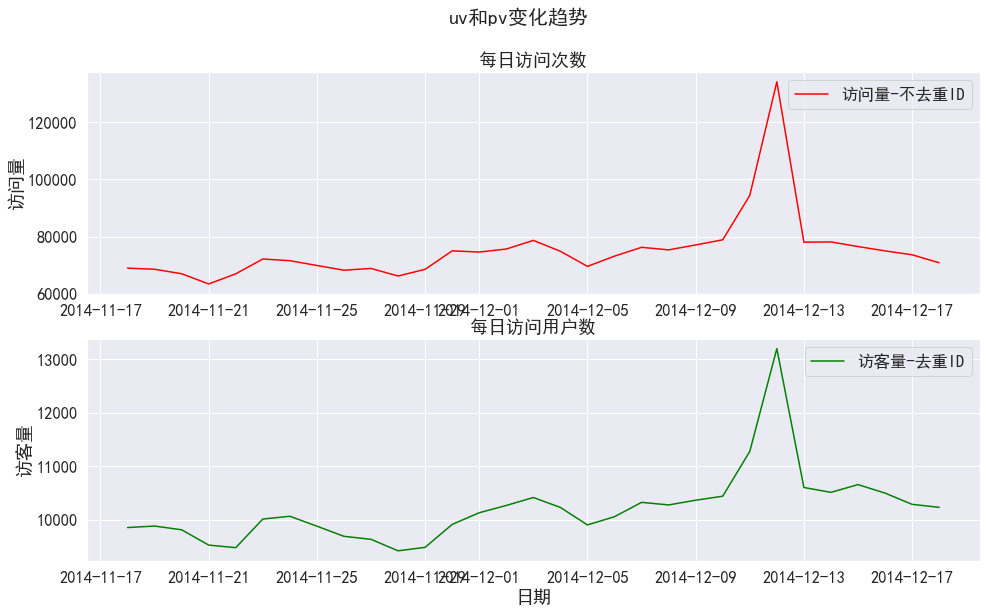

In [67]:
plt.figure(figsize = (16,9))

plt.subplot(211)  
plt.plot(pv_daily,color='red',label = '访问量-不去重ID')
plt.ylabel('访问量')
plt.title('每日访问次数')
plt.legend()

plt.subplot(212)
plt.plot(uv_daliy,color='green',label='访客量-去重ID')
plt.xlabel('日期')
plt.ylabel('访客量')
plt.title('每日访问用户数')
plt.legend()

plt.suptitle('uv和pv变化趋势',fontsize=20)
plt.show()

- 由以上访客量和访问量图可知，两者具有较强的线性关系
- 数据起始为双十一结束后，在双十二数据达到顶端流量

In [37]:
data_user.head(2)

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,135986094,374108523,1,NaN,2825,2014-11-18,2014-11-18,0
1,115953572,72032398,1,NaN,6513,2014-11-18,2014-11-18,0


## 小时访问量-不去重ID

In [47]:
hour_pv = data_user.groupby('hour')['user_id'].count()
hour_pv

hour
0      94290
1      47410
2      27118
3      17664
4      13984
5      16009
6      31575
7      52411
8      74039
9      89450
10    105617
11    100518
12    104578
13    116388
14    113173
15    114494
16    110869
17     98485
18    105495
19    142636
20    177397
21    210320
22    207961
23    157222
Name: user_id, dtype: int64

## 小时访客数-去重ID

In [45]:
data_user.groupby('hour')['user_id'].apply(lambda x:x.drop_duplicates()).value_counts(ascending=True)

61560077      1
102575167     1
59991417      1
53036252      1
119984067     1
             ..
141526457    24
22586157     24
32358007     24
104212981    24
109870377    24
Name: user_id, Length: 19880, dtype: int64

In [50]:
hour_uv = data_user.groupby('hour')['user_id'].apply(lambda x:x.drop_duplicates().count())
hour_uv
# 每小时分组聚合ID数，每个ID进行apply函数使用，每个小时的内部值，进行去重处理，去重结束后进行计数

hour
0      9207
1      5643
2      3625
3      2683
4      2350
5      2784
6      5041
7      8169
8     10685
9     12017
10    12951
11    13120
12    13434
13    13421
14    13290
15    13355
16    13328
17    13038
18    13266
19    14377
20    15029
21    15530
22    15014
23    12764
Name: user_id, dtype: int64

# 可视化绘图

In [58]:
pv_uv_hour = pd.concat([hour_pv,hour_uv],axis=1)
pv_uv_hour.columns = ['hour_pv','hour_uv']
pv_uv_hour.head()

,hour_pv,hour_uv
hour,,
0,94290,9207
1,47410,5643
2,27118,3625
3,17664,2683
4,13984,2350


## 小时访客数-访问量-散点图

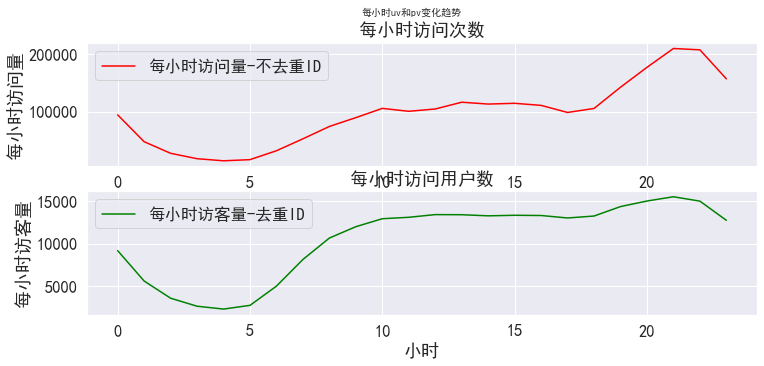

In [65]:
plt.figure(figsize = (12,5))

plt.subplot(211)  
plt.plot(hour_pv,color='red',label = '每小时访问量-不去重ID')
plt.ylabel('每小时访问量')
plt.title('每小时访问次数')
plt.legend()

plt.subplot(212)
plt.plot(hour_uv,color='green',label='每小时访客量-去重ID')
plt.xlabel('小时')
plt.ylabel('每小时访客量')
plt.title('每小时访问用户数')
plt.legend()

plt.suptitle('每小时uv和pv变化趋势',fontsize=10)
plt.show()

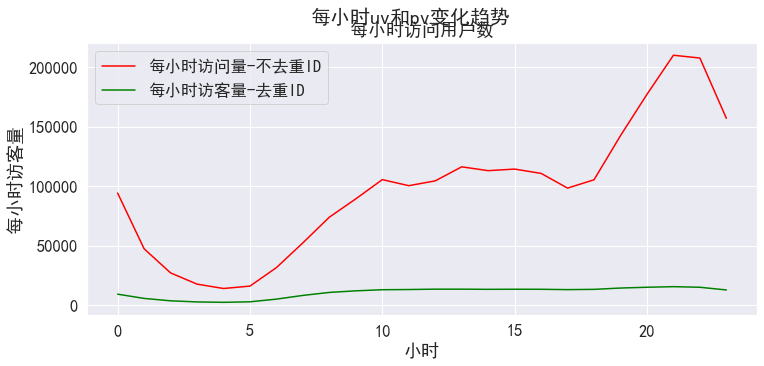

In [63]:
plt.figure(figsize = (12,5))

plt.plot(hour_pv,color='red',label = '每小时访问量-不去重ID')
plt.ylabel('每小时访问量')
plt.title('每小时访问次数')
plt.legend()

plt.plot(hour_uv,color='green',label='每小时访客量-去重ID')
plt.xlabel('小时')
plt.ylabel('每小时访客量')
plt.title('每小时访问用户数')
plt.legend()

plt.suptitle('每小时uv和pv变化趋势',fontsize=20)
plt.show()

## 访客数访问量组合散点图

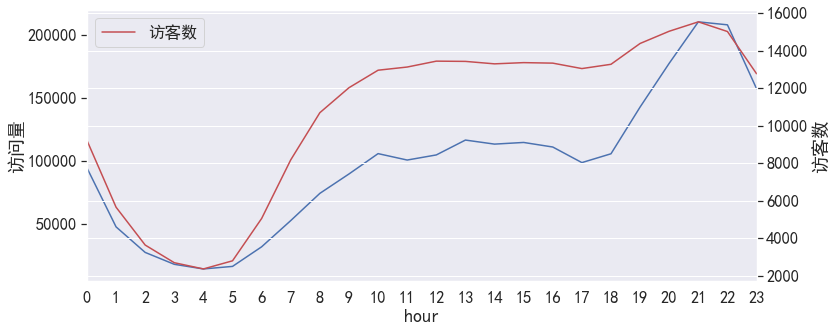

In [131]:
plt.figure(figsize = (12,5))

hour_pv.plot(color='b',label='访问量')
plt.ylabel('访问量')

hour_uv.plot(color='r',label='访客数',secondary_y=True)  
# secondary_y第二个y轴
plt.ylabel('访客数')

plt.xticks(range(0,24),hour)
plt.legend()

plt.grid(True)
plt.show()

In [85]:
hour = []
for i in range(0,24):
    # print(i)
    hour.append(i)
list(hour)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

## 小时访客数访问量柱状图

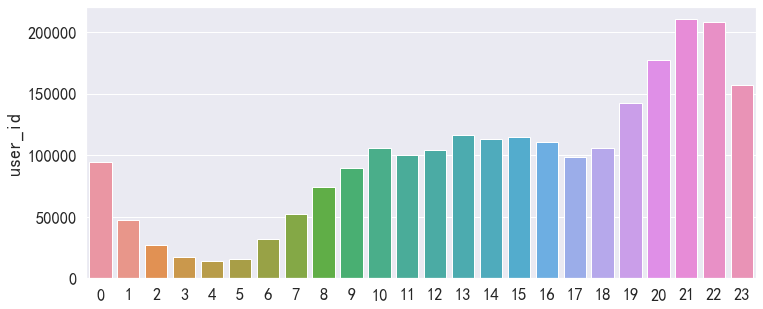

In [87]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.barplot(x=list(hour),y=hour_pv,data=pv_uv_hour)

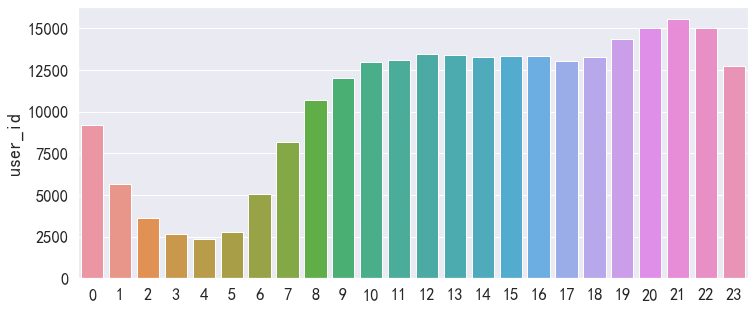

In [88]:
import seaborn as sns
plt.figure(figsize=(12,5))
sns.barplot(x=list(hour),y=hour_uv,data=pv_uv_hour)

In [92]:
pv_uv_hour.describe(include='all')

,hour_pv,hour_uv
count,24.000000,24.000000
mean,97045.958333,10588.375000
std,56194.238665,4429.927616
min,13984.000000,2350.000000
25%,51160.750000,7537.500000
50%,102548.000000,12994.500000
75%,114967.500000,13371.500000
max,210320.000000,15530.000000


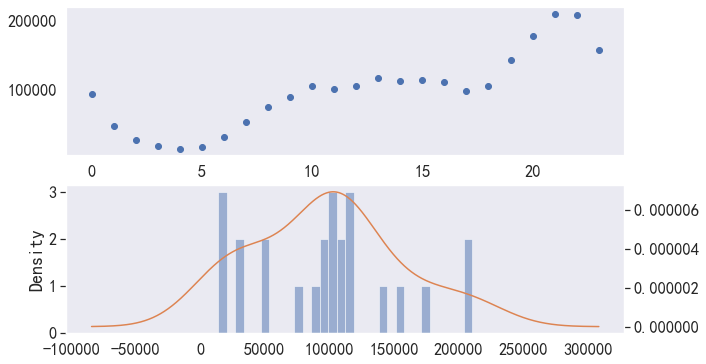

In [95]:
fig = plt.figure(figsize = (10,6))
ax1 = fig.add_subplot(2,1,1)  # 创建子图1
ax1.scatter(hour, pv_uv_hour['hour_pv'])
plt.grid()
# 绘制数据分布图

ax2 = fig.add_subplot(2,1,2)  # 创建子图2
pv_uv_hour['hour_pv'].hist(bins=30,alpha = 0.5,ax = ax2)
pv_uv_hour['hour_pv'].plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()
# 绘制直方图
# 呈现较明显的正太性

# 检验正太分布

- 原假设H0:两个数据分布一致或者数据符合理论分布。D=max| f(x)- g(x)|，当实际观测值D>D(n,α)则拒绝H0，否则则接受H0假设。
- KS检验不需要知道数据的分布情况，可以算是一种非参数检验方法。当然这样方便的代价就是当检验的数据分布符合特定的分布事，KS检验的灵敏度没有相应的检验来的高。在样本量比较小的时候，KS检验最为非参数检验在分析两组数据之间是否不同时相当常用。
- t-检验的假设是检验的数据满足正态分布，否则对于小样本不满足正态分布的数据用t-检验就会造成较大的偏差，虽然对于大样本不满足正态分布的数据而言t-检验还是相当精确有效的手段。

In [101]:
from scipy import stats
# scipy包是一个高级的科学计算库，它和Numpy联系很密切，Scipy一般都是操控Numpy数组来进行科学计算

u = pv_uv_hour['hour_pv'].mean()  # 计算均值
std = pv_uv_hour['hour_pv'].std()  # 计算标准差
stats.kstest(pv_uv_hour['hour_pv'], 'norm', (u, std))
# .kstest方法：KS检验，参数分别是：待检验的数据，检验方法（这里设置成norm正态分布），均值与标准差
# 结果返回两个值：statistic → D值，pvalue → P值
# p值大于0.05，为正态分布


KstestResult(statistic=0.15701471006762524, pvalue=0.553944081712216)

## 非正太分布数据集

mean: 3.6069999999999993 max: 50.57 min: 0.08 std 11.164638302294108
ks: KstestResult(statistic=0.41605086729581714, pvalue=0.0011934132111319073)


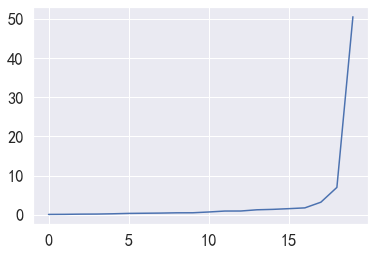

In [122]:
control={1.26, 0.34, 0.70, 1.75, 50.57, 1.55, 0.08, 0.42, 0.50, 3.20, 0.15, 0.49, 0.95, 0.24, 1.37, 0.17, 6.98, 0.10, 0.94, 0.38}
control = pd.Series(list(control))
print('mean:',control.mean(),'max:',control.max(),'min:',control.min(),'std',control.std())
control_mean = control.mean()  # 计算均值
control_std = control.std()  # 计算标准差
ks = stats.kstest(control, 'norm', (control_mean, control_std))
print('ks:',ks)
plt.plot(sorted(control))
# control不符合正太分布数据
# pvalue远远小于0.05 拒绝原假设为正太分布可能性

## 正太分布数据集

In [99]:
from scipy import stats
# scipy包是一个高级的科学计算库，它和Numpy联系很密切，Scipy一般都是操控Numpy数组来进行科学计算

data = [87,77,92,68,80,78,84,77,81,80,80,77,92,86,
       76,80,81,75,77,72,81,72,84,86,80,68,77,87,
       76,77,78,92,75,80,78]
# 样本数据，35位健康男性在未进食之前的血糖浓度

df = pd.DataFrame(data, columns =['value'])
u = df['value'].mean()  # 计算均值
std = df['value'].std()  # 计算标准差
stats.kstest(df['value'], 'norm', (u, std))
# .kstest方法：KS检验，参数分别是：待检验的数据，检验方法（这里设置成norm正态分布），均值与标准差
# 结果返回两个值：statistic → D值，pvalue → P值
# p值大于0.05，为正态分布

KstestResult(statistic=0.1590180704824098, pvalue=0.3066297258358026)

       value
0  10.239908
1   9.672989
2   9.188409
3   9.281115
4   9.078223
均值为：10.01，标准差为：0.99
------
        value
322  6.622677
663  7.488805
337  7.602581
887  7.733010
206  7.735716
----------
    index     value
0    322  6.622677
1    663  7.488805
2    337  7.602581
3    887  7.733010
4    206  7.735716
   index     value       p         q
0    322  6.622677 -0.0005 -3.426472
1    663  7.488805  0.0005 -2.550099
2    337  7.602581  0.0015 -2.434976
3    887  7.733010  0.0025 -2.303004
4    206  7.735716  0.0035 -2.300267
------
四分之一位数为：9.36，四分之三位数为：10.68
------


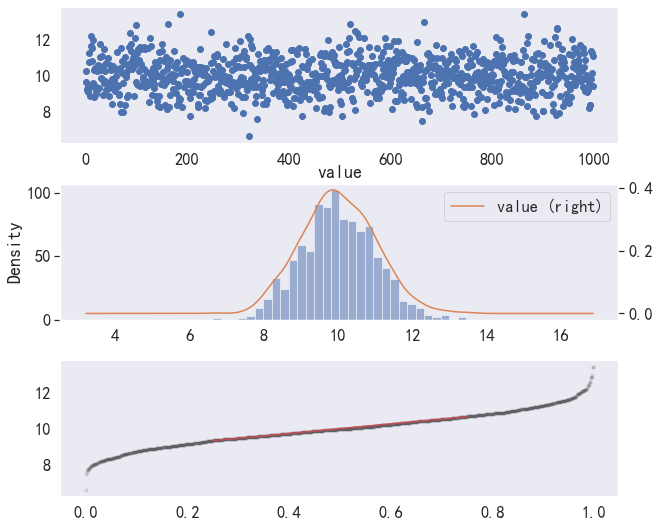

In [126]:
# QQ图通过把测试样本数据的分位数与已知分布相比较，从而来检验数据的分布情况

# QQ图是一种散点图，对应于正态分布的QQ图，就是由标准正态分布的分位数为横坐标，样本值为纵坐标的散点图
# 参考直线：四分之一分位点和四分之三分位点这两点确定，看散点是否落在这条线的附近

# 绘制思路
# ① 在做好数据清洗后，对数据进行排序（次序统计量：x(1)<x(2)<....<x(n)）
# ② 排序后，计算出每个数据对应的百分位p{i}，即第i个数据x(i)为p(i)分位数，其中p(i)=(i-0.5)/n （pi有多重算法，这里以最常用方法为主）
# ③ 绘制直方图 + qq图，直方图作为参考

s = pd.DataFrame(np.random.randn(1000)+10,columns = ['value'])
print(s.head())
# 创建随机数据

mean = s['value'].mean()
std = s['value'].std()
print('均值为：%.2f，标准差为：%.2f' % (mean,std))
print('------')
#  计算均值，标准差

s.sort_values(by = 'value', inplace = True)  # 重新排序
print(s.head())
s_r = s.reset_index(drop = False)  # 重新排序后，更新index
print("----------\n", s_r.head())
s_r['p'] = (s_r.index - 0.5) / len(s_r)  
s_r['q'] = (s_r['value'] - mean) / std
print(s_r.head())
print('------')
# 计算百分位数 p(i)
# 计算q值

st = s['value'].describe()
x1 ,y1 = 0.25, st['25%']
x2 ,y2 = 0.75, st['75%']
print('四分之一位数为：%.2f，四分之三位数为：%.2f' % (y1,y2))
print('------')
# 计算四分之一位数、四分之三位数

fig = plt.figure(figsize = (10,9))
ax1 = fig.add_subplot(3,1,1)  # 创建子图1
ax1.scatter(s.index, s.values)
plt.grid()
# 绘制数据分布图

ax2 = fig.add_subplot(3,1,2)  # 创建子图2
s.hist(bins=30,alpha = 0.5,ax = ax2)
s.plot(kind = 'kde', secondary_y=True,ax = ax2)
plt.grid()
# 绘制直方图

ax3 = fig.add_subplot(3,1,3)  # 创建子图3
ax3.plot(s_r['p'],s_r['value'],'k.',alpha = 0.1)
ax3.plot([x1,x2],[y1,y2],'-r')
plt.grid()
# 绘制QQ图，直线为四分之一位数、四分之三位数的连线，基本符合正态分布


# pv-uv相关性

- pearson：Pearson相关系数来衡量两个数据集合是否在一条线上面，即针对线性数据的相关系数计算，针对非线性                                           数据便会有误差。


- kendall：用于反映分类变量相关性的指标，即针对无序序列的相关系数，非正太分布的数据


- spearman：非线性的，非正太分析的数据的相关系数

In [34]:
pv_uv_daliy.corr()

,pv,uv
pv,1.00000,0.96667
uv,0.96667,1.00000


In [35]:
pv_uv_daliy.corr(method = 'pearson')

,pv,uv
pv,1.00000,0.96667
uv,0.96667,1.00000


In [36]:
pv_uv_daliy.corr(method = 'spearman')

,pv,uv
pv,1.000000,0.937097
uv,0.937097,1.000000


- 相关关系，不管是线性的默认pearson系数和非线性的spearman系数
- 均发现有正向的相关关系

In [61]:
pv_uv_hour.head().corr(method = 'spearman')

,hour_pv,hour_uv
hour_pv,1.0,1.0
hour_uv,1.0,1.0


In [62]:
pv_uv_hour.corr()

,hour_pv,hour_uv
hour_pv,1.000000,0.892632
hour_uv,0.892632,1.000000


# 透视表统计

In [132]:
data_user.head(2)

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,135986094,374108523,1,NaN,2825,2014-11-18,2014-11-18,0
1,115953572,72032398,1,NaN,6513,2014-11-18,2014-11-18,0


In [134]:
data_user.groupby('behavior_type')['user_id'].value_counts()
# 分组聚合只能做到先分组再聚合某个值进行计算结果

behavior_type  user_id  
1              15330397     2487
               40372444     2363
               110581771    1976
               3279691      1868
               108461135    1812
                            ... 
4              65180718        1
               65200062        1
               6525359         1
               65309115        1
               65332965        1
Name: user_id, Length: 49356, dtype: int64

## 每小时不同用户行为次数

In [142]:
pivot_detail = pd.pivot_table(data=data_user,index='hour',columns='behavior_type',values='user_id',aggfunc=np.size)
pivot_detail.head()
# # behavior_type:        用户行为类型（点击、收藏、加购物车、支付---1，2，3，4表示）

behavior_type,1,2,3,4
hour,,,,
0,88792,2046,2476,976
1,44798,1067,1229,316
2,25510,685,739,184
3,16716,362,474,112
4,13215,294,379,96


## 用户行为直线图

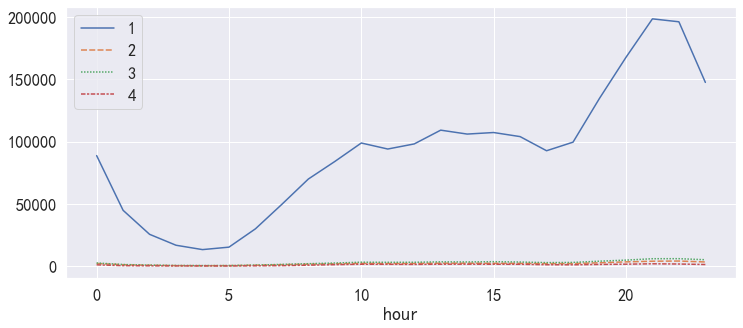

In [155]:
plt.figure(figsize=(12,5))
sns.lineplot(data = pivot_detail)
plt.show()
# 点击数据较多，遮盖了其他三个类型，不展示数据行进行iloc切片处理

In [156]:
pivot_detail.head().iloc[:,1:]

behavior_type,2,3,4
hour,,,
0,2046,2476,976
1,1067,1229,316
2,685,739,184
3,362,474,112
4,294,379,96


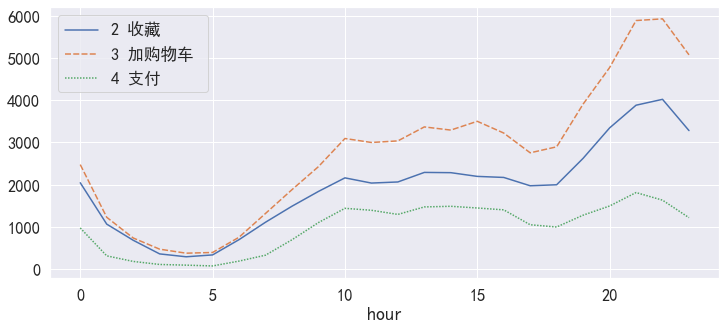

In [154]:
plt.figure(figsize=(12,5))
sns.lineplot(data = pivot_detail.iloc[:,1:])
plt.legend(["2 收藏", "3 加购物车 ",'4 支付'], loc='upper left')
# 用户行为类型（点击、收藏、加购物车、支付---1，2，3，4表示）
plt.show()

# 分组聚合构建新特征

## 用户行为分组聚合

In [159]:
user_type_ = data_user.groupby('behavior_type').count()
user_type_

,user_id,item_id,user_geohash,item_category,time,date,hour
behavior_type,,,,,,,
1,2193483,2193483,697599,2193483,2193483,2193483,2193483
2,46274,46274,13519,46274,46274,46274,46274
3,65816,65816,19958,65816,65816,65816,65816
4,23530,23530,7416,23530,23530,23530,23530


In [157]:
user_type_count = data_user.groupby('behavior_type').size()
user_type_count

behavior_type
1    2193483
2      46274
3      65816
4      23530
dtype: int64

In [164]:
user_type_count[3]

23530

## 消费次数分组聚合

In [176]:
buy_user = data_user[data_user['behavior_type']=='4'].groupby(data_user['user_id']).size()
buy_user

user_id
100002985    1
10001025     1
10001082     1
100045402    1
100051753    2
            ..
65284422     2
65309115     1
65328951     2
65332965     1
65353086     6
Length: 10062, dtype: int64

In [178]:
buy_user.describe()

count    10062.000000
mean         2.338501
std          2.163367
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         53.000000
dtype: float64

## 消费次数箱线图

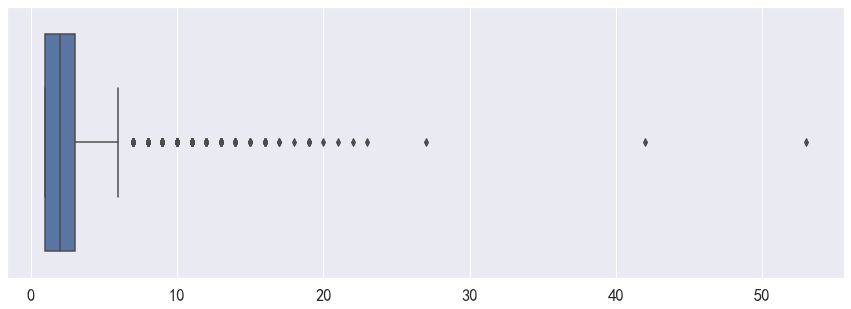

In [182]:
plt.figure(figsize=(15,5))
sns.boxplot(buy_user)

## 分组聚合单日单用户购买

In [188]:
per_day_user = data_user[data_user['behavior_type']=='4'].groupby(['user_id','date']).count()['behavior_type'].reset_index()
per_day_user.rename(columns={'behavior_type':'total'})
per_day_user.head(-1)

,user_id,date,behavior_type
0,100002985,2014-11-30,1
1,10001025,2014-12-04,1
2,10001082,2014-12-02,1
3,100045402,2014-11-25,1
4,100051753,2014-11-27,1
...,...,...,...
19219,65353086,2014-11-21,1
19220,65353086,2014-11-22,1
19221,65353086,2014-11-25,1
19222,65353086,2014-12-03,1


In [183]:
data_user[data_user['behavior_type']=='4'].groupby(['date','user_id']).count()

item_id  behavior_type  user_geohash  item_category  \
date       user_id                                                          
2014-11-18 100260715        1              1             0              1   
           100344346        1              1             0              1   
           100533310        1              1             0              1   
           100572118        1              1             0              1   
           100695202        1              1             0              1   
...                       ...            ...           ...            ...   
2014-12-18 63614984         1              1             0              1   
           64546497         1              1             1              1   
           64723011         1              1             1              1   
           64827438         1              1             0              1   
           65156859         1              1             1              1   

                      time  hour  
date       user_id                
2014-11-18 100260715     1     1  
           100344346     1     1  
           100533310     1     1  
           100572118     1     1  
           100695202     1     1  
...                    ...   ...  
2014-12-18 63614984      1     1  
           64546497      1     1  
           64723011      1     1  
           64827438      1     1  
           65156859      1     1  

[19225 rows x 6 columns]

In [184]:
data_user[data_user['behavior_type']=='4'].groupby(['date','user_id']).count()['behavior_type']

date        user_id  
2014-11-18  100260715    1
            100344346    1
            100533310    1
            100572118    1
            100695202    1
                        ..
2014-12-18  63614984     1
            64546497     1
            64723011     1
            64827438     1
            65156859     1
Name: behavior_type, Length: 19225, dtype: int64

In [189]:
per_day_user = data_user[data_user['behavior_type']=='4'].groupby(['date','user_id']).count()['behavior_type'].reset_index()
per_day_user.rename(columns={'behavior_type':'total'},inplace=True)
per_day_user.head()

,date,user_id,total
0,2014-11-18,100260715,1
1,2014-11-18,100344346,1
2,2014-11-18,100533310,1
3,2014-11-18,100572118,1
4,2014-11-18,100695202,1


In [190]:
per_day_user['total'].mean()

1.223927178153446

## 每日人均消费次数

In [201]:
per_day_user.groupby(per_day_user['date'])['user_id'].count()[0:3]
# 每日消费的人数ID总数

date
2014-11-18    520
2014-11-19    536
2014-11-20    527
Name: user_id, dtype: int64

In [202]:
per_day_user.groupby(per_day_user['date'])['total'].sum()[0:3]
# 每日总消费总次数

date
2014-11-18    647
2014-11-19    627
2014-11-20    608
Name: total, dtype: int64

In [203]:
per_day_user.groupby(per_day_user['date'])['total'].mean()[0:3]
# 每日总消费次数均值,因已分好了日期和userid，求总数的均值则为单日单日购买平均购买次数

date
2014-11-18    1.244231
2014-11-19    1.169776
2014-11-20    1.153700
Name: total, dtype: float64

In [210]:
per_date_user_total = ((per_day_user.groupby(per_day_user['date'])['total'].sum()) 
 / 
 (per_day_user.groupby(per_day_user['date'])['user_id'].count()))

per_date_user_total[0:3]

date
2014-11-18    1.244231
2014-11-19    1.169776
2014-11-20    1.153700
dtype: float64

## 日人均次数直线图

In [211]:
per_date_user_total.describe()

count    31.000000
mean      1.207407
std       0.047248
min       1.147651
25%       1.177617
50%       1.202020
75%       1.218368
max       1.403388
dtype: float64

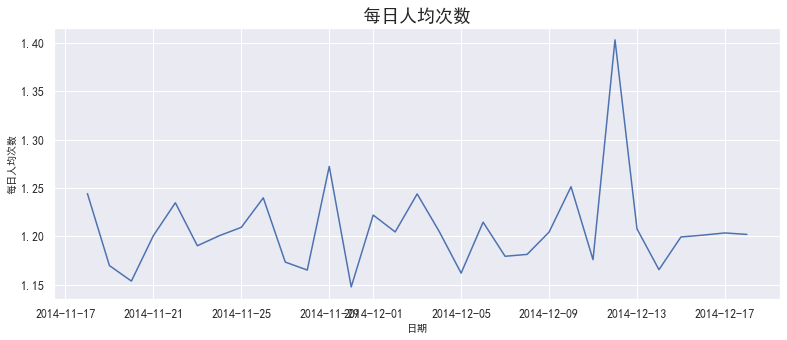

In [223]:
plt.figure(figsize=(13,5))
sns.lineplot(data=per_date_user_total)
plt.tick_params(labelsize=12)
font = {'weight': 'normal','size': 10}
plt.xlabel('日期', font)
plt.ylabel('每日人均次数', font)
plt.title("每日人均次数")
plt.show()

## 每日用户活跃统计

In [231]:
data_user.groupby(data_user['date'])['item_id'].count()[0:3]

date
2014-11-18    68915
2014-11-19    68528
2014-11-20    66959
Name: item_id, dtype: int64

In [234]:
data_user.groupby(['date','user_id'])['item_id'].count()[0:3]

date        user_id  
2014-11-18  10001025     14
            100045402     1
            100051753     3
Name: item_id, dtype: int64

In [235]:
data_user.groupby(['date','user_id','behavior_type'])['item_id'].count()[0:3]

date        user_id    behavior_type
2014-11-18  10001025   1                14
            100045402  1                 1
            100051753  1                 3
Name: item_id, dtype: int64

In [237]:
data_user.groupby(['date','user_id','behavior_type'])['item_id'].count().reset_index()[0:3]

,date,user_id,behavior_type,item_id
0,2014-11-18,10001025,1,14
1,2014-11-18,100045402,1,1
2,2014-11-18,100051753,1,3


In [239]:
data_user.groupby(['date','user_id','behavior_type'])['item_id'].count().reset_index()[0:3].rename(columns={'item_id':'active_total'})

,date,user_id,behavior_type,active_total
0,2014-11-18,10001025,1,14
1,2014-11-18,100045402,1,1
2,2014-11-18,100051753,1,3


In [276]:
data_user[data_user['date'] == '2014-11-18']

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,33259537,190150154,1,NaN,5842,2014-11-18 00:00:00,2014-11-18,0
1,53335367,20825302,1,NaN,10894,2014-11-18 00:00:00,2014-11-18,0
2,39451664,66861869,1,NaN,5894,2014-11-18 00:00:00,2014-11-18,0
3,61720898,81944631,1,NaN,11279,2014-11-18 00:00:00,2014-11-18,0
4,120207907,81175653,1,NaN,11279,2014-11-18 00:00:00,2014-11-18,0
...,...,...,...,...,...,...,...,...
68242,54710645,388179536,1,NaN,10230,2014-11-18 23:00:00,2014-11-18,23
68243,10713699,168116995,2,NaN,3662,2014-11-18 23:00:00,2014-11-18,23
68244,54862823,51969877,1,97sp1ap,4264,2014-11-18 23:00:00,2014-11-18,23
68245,33397213,285894190,1,NaN,6054,2014-11-18 23:00:00,2014-11-18,23


In [274]:
data_user[data_user['user_id'] == '100045402']

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
18266,100045402,349980875,1,NaN,3156,2014-11-18 11:00:00,2014-11-18,11
36261,100045402,403809242,1,NaN,1843,2014-11-18 17:00:00,2014-11-18,17
115281,100045402,165517398,1,NaN,5894,2014-11-19 20:00:00,2014-11-19,20
115488,100045402,261403630,1,NaN,5894,2014-11-19 20:00:00,2014-11-19,20
116940,100045402,47737787,1,NaN,4865,2014-11-19 20:00:00,2014-11-19,20
...,...,...,...,...,...,...,...,...
2129801,100045402,395465355,1,NaN,7811,2014-12-16 11:00:00,2014-12-16,11
2161769,100045402,381141754,1,NaN,9397,2014-12-16 20:00:00,2014-12-16,20
2204951,100045402,320038513,1,94j6tq3,1421,2014-12-17 11:00:00,2014-12-17,11
2303493,100045402,155301307,1,NaN,8291,2014-12-18 19:00:00,2014-12-18,19


In [275]:
data_user[data_user['date'] == '2014-11-18'][data_user['user_id'] == '100045402']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
18266,100045402,349980875,1,NaN,3156,2014-11-18 11:00:00,2014-11-18,11
36261,100045402,403809242,1,NaN,1843,2014-11-18 17:00:00,2014-11-18,17


In [281]:
user_active_3 = data_user.groupby(['date','user_id','behavior_type'])['item_id'].count().reset_index()[0:3].rename(columns={'item_id':'active_total'})
user_active_3.head()

,date,user_id,behavior_type,active_total
0,2014-11-18,10001025,1,11
1,2014-11-18,100029775,1,1
2,2014-11-18,100045402,1,2


In [282]:
user_active = data_user.groupby(['date','user_id','behavior_type'])['item_id'].count().reset_index().rename(columns={'item_id':'active_total'})
user_active.head()

,date,user_id,behavior_type,active_total
0,2014-11-18,10001025,1,11
1,2014-11-18,100029775,1,1
2,2014-11-18,100045402,1,2
3,2014-11-18,100051753,1,3
4,2014-11-18,100065058,1,12


In [291]:
user_active.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404337 entries, 0 to 404336
Data columns (total 4 columns):
date             404337 non-null datetime64[ns]
user_id          404337 non-null object
behavior_type    404337 non-null object
active_total     404337 non-null int64
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 12.3+ MB


## 付费次数占比日活次数百分比

In [296]:
# 每日活跃次数总数
all_user_number = user_active.groupby(['date'])['active_total'].sum()
all_user_number[0:3]

date
2014-11-18    68247
2014-11-19    69037
2014-11-20    67576
Name: active_total, dtype: int64

In [311]:
all_user_number.index,len(all_user_number.index)

(DatetimeIndex(['2014-11-18', '2014-11-19', '2014-11-20', '2014-11-21',
                '2014-11-22', '2014-11-23', '2014-11-24', '2014-11-25',
                '2014-11-26', '2014-11-27', '2014-11-28', '2014-11-29',
                '2014-11-30', '2014-12-01', '2014-12-02', '2014-12-03',
                '2014-12-04', '2014-12-05', '2014-12-06', '2014-12-07',
                '2014-12-08', '2014-12-09', '2014-12-10', '2014-12-11',
                '2014-12-12', '2014-12-13', '2014-12-14', '2014-12-15',
                '2014-12-16', '2014-12-17', '2014-12-18'],
               dtype='datetime64[ns]', name='date', freq=None), 31)

In [297]:
money_user_number = user_active[user_active['behavior_type']=='4'].groupby(['date'])['active_total'].sum()
money_user_number[0:3]
# behavior=4消费了的所有用户，每日分组后，求活跃次数数据

date
2014-11-18    619
2014-11-19    662
2014-11-20    615
Name: active_total, dtype: int64

In [304]:
money_user_number[0] / all_user_number[0],all_user_number.index[0]
# 18号，消费的次数 除以 总行为次数 = 付费次数占比

(0.00906999575072897, Timestamp('2014-11-18 00:00:00'))

In [307]:
money_all_per = money_user_number / all_user_number
money_all_per[0:5]

date
2014-11-18    0.009070
2014-11-19    0.009589
2014-11-20    0.009101
2014-11-21    0.009925
2014-11-22    0.009745
Name: active_total, dtype: float64

In [332]:
len(money_all_per)

31

In [334]:
len(all_user_number.index)

31

In [352]:
all_user_number.index

DatetimeIndex(['2014-11-18', '2014-11-19', '2014-11-20', '2014-11-21',
               '2014-11-22', '2014-11-23', '2014-11-24', '2014-11-25',
               '2014-11-26', '2014-11-27', '2014-11-28', '2014-11-29',
               '2014-11-30', '2014-12-01', '2014-12-02', '2014-12-03',
               '2014-12-04', '2014-12-05', '2014-12-06', '2014-12-07',
               '2014-12-08', '2014-12-09', '2014-12-10', '2014-12-11',
               '2014-12-12', '2014-12-13', '2014-12-14', '2014-12-15',
               '2014-12-16', '2014-12-17', '2014-12-18'],
              dtype='datetime64[ns]', name='date', freq=None)

In [368]:
all_user_number.index.year

Int64Index([2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
            2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014,
            2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014],
           dtype='int64', name='date')

In [378]:
len(list(all_user_number.index.day))

31

In [350]:
str(list(all_user_number.index))[12:22]

'2014-11-18'

## 每日活跃付费次数占比直线图

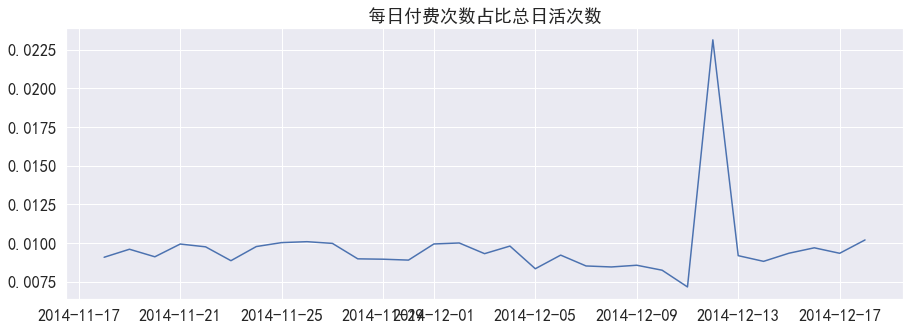

In [386]:
plt.figure(figsize=(15,5))
plt.plot(money_all_per)
plt.title('每日付费次数占比总日活次数')
plt.show()

## 每日消费人数占比总人数

In [387]:
data_user.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,33259537,190150154,1,NaN,5842,2014-11-18,2014-11-18,0
1,53335367,20825302,1,NaN,10894,2014-11-18,2014-11-18,0
2,39451664,66861869,1,NaN,5894,2014-11-18,2014-11-18,0
3,61720898,81944631,1,NaN,11279,2014-11-18,2014-11-18,0
4,120207907,81175653,1,NaN,11279,2014-11-18,2014-11-18,0


In [388]:
rebuy = data_user[data_user['behavior_type']=='4'].groupby(['user_id'])['date'].count()
rebuy

user_id
10001025     1
100029775    1
100051753    1
100065058    5
100068031    1
            ..
65309115     2
65328951     4
65332965     1
6534626      5
65353086     7
Name: date, Length: 9944, dtype: int64

In [392]:
rebuy[rebuy>=2].count() / rebuy.count()

0.542739340305712

In [400]:
 data_user[data_user['behavior_type']=='4'].groupby('date').apply(lambda x:x.drop_duplicates())['user_id'].count()

22972

In [403]:
data_user[data_user['behavior_type']=='4'].groupby('date').apply(lambda x:x.drop_duplicates())

user_id    item_id behavior_type user_geohash  \
date                                                                  
2014-11-18 35       141826607   80296222             4          NaN   
           173       50805790   66722357             4          NaN   
           578       45919406  138745924             4          NaN   
           1109     137812968  400826896             4          NaN   
           1365     103466185  263353402             4          NaN   
...                       ...        ...           ...          ...   
2014-12-18 2328357   40802089  250138552             4      9h9unrf   
           2328777  120680836  363019586             4          NaN   
           2328900   15319795  268678291             4          NaN   
           2329058  114328130  308956287             4      96kairn   
           2329067  112101175  269343939             4      95w9inm   

                   item_category                time       date  hour  
date                                                                   
2014-11-18 35               5271 2014-11-18 00:00:00 2014-11-18     0  
           173              3064 2014-11-18 00:00:00 2014-11-18     0  
           578               881 2014-11-18 00:00:00 2014-11-18     0  
           1109             6915 2014-11-18 00:00:00 2014-11-18     0  
           1365             5360 2014-11-18 00:00:00 2014-11-18     0  
...                          ...                 ...        ...   ...  
2014-12-18 2328357          4582 2014-12-18 23:00:00 2014-12-18    23  
           2328777           288 2014-12-18 23:00:00 2014-12-18    23  
           2328900           892 2014-12-18 23:00:00 2014-12-18    23  
           2329058          8650 2014-12-18 23:00:00 2014-12-18    23  
           2329067          7880 2014-12-18 23:00:00 2014-12-18    23  

[22972 rows x 8 columns]

In [411]:
pay_date_dup_user = data_user[data_user['behavior_type']=='4'].groupby('date').apply(lambda x:x.drop_duplicates())
pay_date_dup_user

user_id    item_id behavior_type user_geohash  \
date                                                                  
2014-11-18 35       141826607   80296222             4          NaN   
           173       50805790   66722357             4          NaN   
           578       45919406  138745924             4          NaN   
           1109     137812968  400826896             4          NaN   
           1365     103466185  263353402             4          NaN   
...                       ...        ...           ...          ...   
2014-12-18 2328357   40802089  250138552             4      9h9unrf   
           2328777  120680836  363019586             4          NaN   
           2328900   15319795  268678291             4          NaN   
           2329058  114328130  308956287             4      96kairn   
           2329067  112101175  269343939             4      95w9inm   

                   item_category                time       date  hour  
date                                                                   
2014-11-18 35               5271 2014-11-18 00:00:00 2014-11-18     0  
           173              3064 2014-11-18 00:00:00 2014-11-18     0  
           578               881 2014-11-18 00:00:00 2014-11-18     0  
           1109             6915 2014-11-18 00:00:00 2014-11-18     0  
           1365             5360 2014-11-18 00:00:00 2014-11-18     0  
...                          ...                 ...        ...   ...  
2014-12-18 2328357          4582 2014-12-18 23:00:00 2014-12-18    23  
           2328777           288 2014-12-18 23:00:00 2014-12-18    23  
           2328900           892 2014-12-18 23:00:00 2014-12-18    23  
           2329058          8650 2014-12-18 23:00:00 2014-12-18    23  
           2329067          7880 2014-12-18 23:00:00 2014-12-18    23  

[22972 rows x 8 columns]

In [443]:
str(pay_date_dup_user.index[0][0])[0:10]

'2014-11-18'

In [456]:
len(pay_date_dup_user.index)

22972

In [457]:
for i in range(3):
    print(i)

0
1
2


In [455]:
str(pay_date_dup_user.index[11020][0])[0:10]

'2014-12-04'

In [458]:
datetime = []
for i in range(len(pay_date_dup_user.index)):
    datetime.append(str(pay_date_dup_user.index[i][0])[0:10])
len(datetime)


22972

In [459]:
datetime[-1]

'2014-12-18'

In [460]:
pay_date_dup_user['datetime'] = datetime
pay_date_dup_user.head(-1)

user_id    item_id behavior_type user_geohash  \
date                                                                  
2014-11-18 35       141826607   80296222             4          NaN   
           173       50805790   66722357             4          NaN   
           578       45919406  138745924             4          NaN   
           1109     137812968  400826896             4          NaN   
           1365     103466185  263353402             4          NaN   
...                       ...        ...           ...          ...   
2014-12-18 2328035  137600652  317286096             4      95rwb17   
           2328357   40802089  250138552             4      9h9unrf   
           2328777  120680836  363019586             4          NaN   
           2328900   15319795  268678291             4          NaN   
           2329058  114328130  308956287             4      96kairn   

                   item_category                time       date  hour  \
date                                                                    
2014-11-18 35               5271 2014-11-18 00:00:00 2014-11-18     0   
           173              3064 2014-11-18 00:00:00 2014-11-18     0   
           578               881 2014-11-18 00:00:00 2014-11-18     0   
           1109             6915 2014-11-18 00:00:00 2014-11-18     0   
           1365             5360 2014-11-18 00:00:00 2014-11-18     0   
...                          ...                 ...        ...   ...   
2014-12-18 2328035          1877 2014-12-18 23:00:00 2014-12-18    23   
           2328357          4582 2014-12-18 23:00:00 2014-12-18    23   
           2328777           288 2014-12-18 23:00:00 2014-12-18    23   
           2328900           892 2014-12-18 23:00:00 2014-12-18    23   
           2329058          8650 2014-12-18 23:00:00 2014-12-18    23   

                      datetime  
date                            
2014-11-18 35       2014-11-18  
           173      2014-11-18  
           578      2014-11-18  
           1109     2014-11-18  
           1365     2014-11-18  
...                        ...  
2014-12-18 2328035  2014-12-18  
           2328357  2014-12-18  
           2328777  2014-12-18  
           2328900  2014-12-18  
           2329058  2014-12-18  

[22971 rows x 9 columns]

### 每日消费人数

In [468]:
pay_date_dup_user.groupby(['datetime'])['user_id'].count().values
# 每日消费人数

array([ 610,  649,  600,  624,  643,  637,  685,  690,  663,  679,  584,
        604,  657,  731,  750,  720,  718,  576,  664,  648,  634,  647,
        644,  667, 3073,  694,  682,  691,  719,  676,  713], dtype=int64)

In [467]:
per_day_pay_people = pay_date_dup_user.groupby(['datetime'])['item_id'].count()
per_day_pay_people.values

array([ 610,  649,  600,  624,  643,  637,  685,  690,  663,  679,  584,
        604,  657,  731,  750,  720,  718,  576,  664,  648,  634,  647,
        644,  667, 3073,  694,  682,  691,  719,  676,  713], dtype=int64)

In [469]:
data_user.head(2)

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,33259537,190150154,1,NaN,5842,2014-11-18,2014-11-18,0
1,53335367,20825302,1,NaN,10894,2014-11-18,2014-11-18,0


In [475]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329103 entries, 0 to 2329102
Data columns (total 8 columns):
user_id          object
item_id          object
behavior_type    object
user_geohash     object
item_category    object
time             datetime64[ns]
date             datetime64[ns]
hour             int32
dtypes: datetime64[ns](2), int32(1), object(5)
memory usage: 133.3+ MB


In [477]:
data_user[data_user['user_id'] == '141826607'][data_user['date']=='2014-11-18']
# 单个用户 可以点击多个商品生成记录 成单也只一个数据行

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
35,141826607,80296222,4,NaN,5271,2014-11-18 00:00:00,2014-11-18,0
1034,141826607,139057417,1,NaN,4264,2014-11-18 00:00:00,2014-11-18,0
1138,141826607,165512318,1,NaN,4264,2014-11-18 00:00:00,2014-11-18,0
1335,141826607,136080071,1,NaN,9247,2014-11-18 00:00:00,2014-11-18,0
1924,141826607,268111870,1,NaN,3252,2014-11-18 00:00:00,2014-11-18,0
6048,141826607,66229702,1,NaN,8879,2014-11-18 06:00:00,2014-11-18,6
6885,141826607,257087298,1,NaN,10275,2014-11-18 07:00:00,2014-11-18,7


In [480]:
len(data_user[data_user['user_id'] == '141826607'][data_user['date']=='2014-11-18'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


7

In [484]:
len(data_user[data_user['user_id'] == '141826607'][data_user['date']=='2014-11-18']['item_id'].drop_duplicates())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


7

In [479]:
data_user[data_user['user_id'] == '141826607'][data_user['date']=='2014-11-18'][data_user['item_id']=='80296222']
# 每一天单个用户，针对单个商品，只有一个结果，意味着每一个用户，要么购买，要么不够卖，不存在一天内有两个状态数据行


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
35,141826607,80296222,4,NaN,5271,2014-11-18,2014-11-18,0


### 每日去重总人数

In [485]:
data_user.groupby(['date'])['user_id'].count()
# 未进行去重 按每日分组 聚合每个用户 在不同的点击收藏购物车消费 的总数 会重复
# 需进行每个状态只留下一个ID 且 是每天都只留1个ID

date
2014-11-18     68247
2014-11-19     69037
2014-11-20     67576
2014-11-21     63578
2014-11-22     67010
2014-11-23     72551
2014-11-24     71393
2014-11-25     70067
2014-11-26     68073
2014-11-27     69122
2014-11-28     65787
2014-11-29     68314
2014-11-30     75060
2014-12-01     74728
2014-12-02     75439
2014-12-03     78577
2014-12-04     74334
2014-12-05     69648
2014-12-06     73300
2014-12-07     76755
2014-12-08     75451
2014-12-09     76924
2014-12-10     79198
2014-12-11     94266
2014-12-12    134094
2014-12-13     77615
2014-12-14     77906
2014-12-15     75984
2014-12-16     74885
2014-12-17     73334
2014-12-18     70850
Name: user_id, dtype: int64

In [488]:
data_user.groupby(['date']).apply(lambda x:x.drop_duplicates())
# 按日期分组后并去重每个日期内的数据行内，重复的数据行

user_id    item_id behavior_type user_geohash  \
date                                                                  
2014-11-18 0         33259537  190150154             1          NaN   
           1         53335367   20825302             1          NaN   
           2         39451664   66861869             1          NaN   
           3         61720898   81944631             1          NaN   
           4        120207907   81175653             1          NaN   
...                       ...        ...           ...          ...   
2014-12-18 2329097    1992721   92898480             1      962vgra   
           2329098     190518  220925198             1      9qv4jv4   
           2329099   57766752   83691259             1          NaN   
           2329100   51381793  356841177             1      9rais4r   
           2329102   61605242  248043693             3      95f7uav   

                   item_category                time       date  hour  
date                                                                   
2014-11-18 0                5842 2014-11-18 00:00:00 2014-11-18     0  
           1               10894 2014-11-18 00:00:00 2014-11-18     0  
           2                5894 2014-11-18 00:00:00 2014-11-18     0  
           3               11279 2014-11-18 00:00:00 2014-11-18     0  
           4               11279 2014-11-18 00:00:00 2014-11-18     0  
...                          ...                 ...        ...   ...  
2014-12-18 2329097          7619 2014-12-18 23:00:00 2014-12-18    23  
           2329098          4250 2014-12-18 23:00:00 2014-12-18    23  
           2329099          8133 2014-12-18 23:00:00 2014-12-18    23  
           2329100          6344 2014-12-18 23:00:00 2014-12-18    23  
           2329102          1435 2014-12-18 23:00:00 2014-12-18    23  

[2212218 rows x 8 columns]

In [492]:
data_user.groupby(['date'])['user_id'].apply(lambda x:x.drop_duplicates())

date               
2014-11-18  0           33259537
            1           53335367
            2           39451664
            3           61720898
            4          120207907
                         ...    
2014-12-18  2328959    139264747
            2328968     12196380
            2328980    106160216
            2329065     29778560
            2329066     56459292
Name: user_id, Length: 316258, dtype: object

In [494]:
per_day_all_people = pd.DataFrame(data_user.groupby(['date'])['user_id'].apply(lambda x:x.drop_duplicates()))
per_day_all_people

user_id
date                         
2014-11-18 0         33259537
           1         53335367
           2         39451664
           3         61720898
           4        120207907
...                       ...
2014-12-18 2328959  139264747
           2328968   12196380
           2328980  106160216
           2329065   29778560
           2329066   56459292

[316258 rows x 1 columns]

In [496]:
len(per_day_all_people)

316258

In [495]:
per_day_all_people.index

MultiIndex([('2014-11-18',       0),
            ('2014-11-18',       1),
            ('2014-11-18',       2),
            ('2014-11-18',       3),
            ('2014-11-18',       4),
            ('2014-11-18',       5),
            ('2014-11-18',       6),
            ('2014-11-18',       7),
            ('2014-11-18',       8),
            ('2014-11-18',       9),
            ...
            ('2014-12-18', 2328810),
            ('2014-12-18', 2328871),
            ('2014-12-18', 2328914),
            ('2014-12-18', 2328945),
            ('2014-12-18', 2328956),
            ('2014-12-18', 2328959),
            ('2014-12-18', 2328968),
            ('2014-12-18', 2328980),
            ('2014-12-18', 2329065),
            ('2014-12-18', 2329066)],
           names=['date', None], length=316258)

In [505]:
str(per_day_all_people.index[0][0])[0:10]

'2014-11-18'

In [508]:
str(per_day_all_people.index[310000][0])[0:10]

'2014-12-18'

In [509]:
datetime_all = []
for i in range(len(per_day_all_people.index)):
    datetime_all.append(str(per_day_all_people.index[i][0])[0:10])
len(datetime_all)

316258

In [510]:
per_day_all_people['datetimeall'] = datetime_all
per_day_all_people.head(2)

user_id datetimeall
date                              
2014-11-18 0  33259537  2014-11-18
           1  53335367  2014-11-18

## 每日消费占比每日总人数

In [513]:
per_day_all_people.groupby(['datetimeall'])['user_id'].count().values

array([ 9798,  9853,  9791,  9594,  9492,  9995, 10058,  9869,  9782,
        9663,  9409,  9494,  9913, 10179, 10231, 10442, 10224,  9962,
        9992, 10377, 10288, 10338, 10470, 11225, 13167, 10615, 10481,
       10669, 10449, 10322, 10116], dtype=int64)

In [514]:
per_day_pay_people.values

array([ 610,  649,  600,  624,  643,  637,  685,  690,  663,  679,  584,
        604,  657,  731,  750,  720,  718,  576,  664,  648,  634,  647,
        644,  667, 3073,  694,  682,  691,  719,  676,  713], dtype=int64)

In [515]:
len(per_day_all_people.groupby(['datetimeall'])['user_id'].count().values),len(per_day_pay_people.values)

(31, 31)

In [518]:
(per_day_pay_people.values[0]) / (per_day_all_people.groupby(['datetimeall'])['user_id'].count().values[0])
# 每日，去重为单个用户后，消费的用户数量，除以，有消费或加购物车或点击或收藏的去重ID 
# 得到每日消费人数占比总行为用户比例

0.06225760359256991

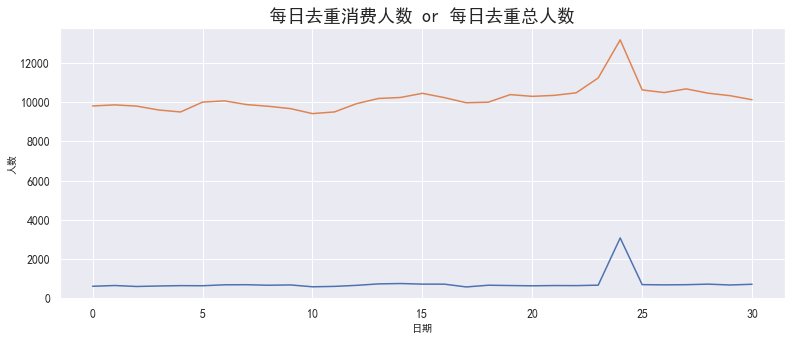

In [526]:
plt.figure(figsize=(13,5))

sns.lineplot(data=per_day_pay_people.values)
sns.lineplot(data=per_day_all_people.groupby(['datetimeall'])['user_id'].count().values)

plt.tick_params(labelsize=12)
font = {'weight': 'normal','size': 10}
plt.xlabel('日期', font)
plt.ylabel('人数', font)
plt.title("每日去重消费人数 or 每日去重总人数")
plt.show()

In [528]:
per_pay_all = (per_day_pay_people.values) / (per_day_all_people.groupby(['datetimeall'])['user_id'].count().values)
per_pay_all

array([0.0622576 , 0.06586826, 0.06128077, 0.06504065, 0.06774126,
       0.06373187, 0.06810499, 0.0699159 , 0.06777755, 0.07026803,
       0.06206823, 0.06361913, 0.06627661, 0.07181452, 0.07330662,
       0.06895231, 0.07022692, 0.05781971, 0.06645316, 0.06244579,
       0.06162519, 0.06258464, 0.06150907, 0.05942094, 0.2333865 ,
       0.06537918, 0.06507013, 0.06476708, 0.06881041, 0.06549118,
       0.0704824 ])

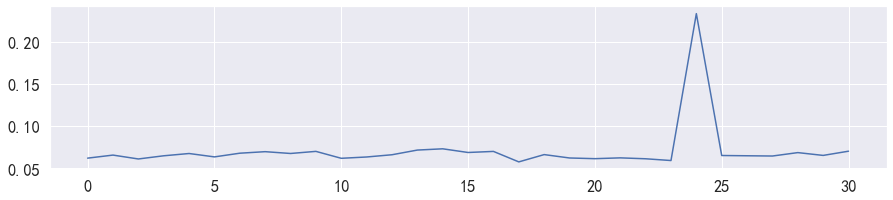

In [737]:
plt.figure(figsize=(15,3))
plt.plot(pd.DataFrame(per_pay_all))

## 回购率-一天内购买多次

In [555]:
reply = data_user[data_user['behavior_type']=='4'].groupby(['user_id'])['date'].count()
reply

user_id
10001025     1
100029775    1
100051753    1
100065058    5
100068031    1
            ..
65309115     2
65328951     4
65332965     1
6534626      5
65353086     7
Name: date, Length: 9944, dtype: int64

In [549]:
len(reply[reply==1])

4547

In [550]:
len(reply[reply!=1])

5397

In [551]:
max(reply),min(reply),len(reply)

(48, 1, 9944)

In [552]:
len(reply[reply!=1]) / len(reply)

0.542739340305712

In [548]:
reply.describe()

count    9944.000000
mean        2.341915
std         2.153271
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        48.000000
Name: date, dtype: float64

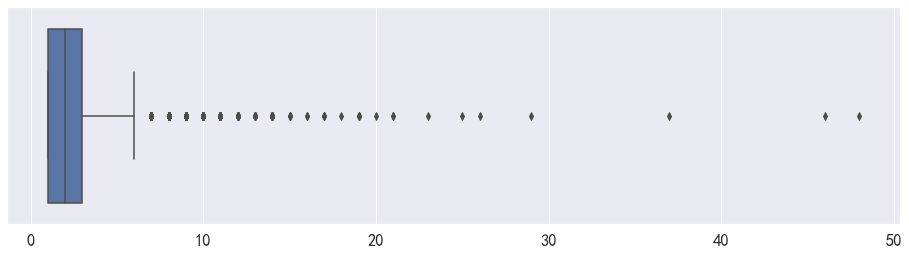

In [547]:
plt.figure(figsize=(16,4))
sns.boxplot(reply.values)

# 消费行为计算转化率

## 收藏流失率=(点击-收藏)÷点击

In [160]:
(user_type_count[0]-user_type_count[1])/user_type_count[0]

0.978903871149218

## 收藏转化率=收藏÷点击

In [168]:
(user_type_count[1])/user_type_count[0]

0.021096128850782065

## 购物车流失率

In [161]:
(user_type_count[0]-user_type_count[2])/user_type_count[0]

0.9699947526377

## 加购物车的购买转化率

In [165]:
(user_type_count[2]-user_type_count[3])/user_type_count[2]

0.6424881487784125

# RFM模型-最近间隔-频次-金额

In [560]:
data_user.head(-1)

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,33259537,190150154,1,NaN,5842,2014-11-18 00:00:00,2014-11-18,0
1,53335367,20825302,1,NaN,10894,2014-11-18 00:00:00,2014-11-18,0
2,39451664,66861869,1,NaN,5894,2014-11-18 00:00:00,2014-11-18,0
3,61720898,81944631,1,NaN,11279,2014-11-18 00:00:00,2014-11-18,0
4,120207907,81175653,1,NaN,11279,2014-11-18 00:00:00,2014-11-18,0
...,...,...,...,...,...,...,...,...
2329097,1992721,92898480,1,962vgra,7619,2014-12-18 23:00:00,2014-12-18,23
2329098,190518,220925198,1,9qv4jv4,4250,2014-12-18 23:00:00,2014-12-18,23
2329099,57766752,83691259,1,NaN,8133,2014-12-18 23:00:00,2014-12-18,23
2329100,51381793,356841177,1,9rais4r,6344,2014-12-18 23:00:00,2014-12-18,23


In [557]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329103 entries, 0 to 2329102
Data columns (total 8 columns):
user_id          object
item_id          object
behavior_type    object
user_geohash     object
item_category    object
time             datetime64[ns]
date             datetime64[ns]
hour             int32
dtypes: datetime64[ns](2), int32(1), object(5)
memory usage: 133.3+ MB


## R 最近一次购买距离截止的时长

In [565]:
max(data_user['date'])

Timestamp('2014-12-18 00:00:00')

In [566]:
max(data_user['date']) - min(data_user['date'])

Timedelta('30 days 00:00:00')

In [567]:
data_user.columns

Index(['user_id', 'item_id', 'behavior_type', 'user_geohash', 'item_category',
       'time', 'date', 'hour'],
      dtype='object')

In [573]:
data_user.groupby('user_id')['date'].apply(lambda x:x.sort_values(ascending=False))
# 分组构建了个子集，每个子集进行的所有X进行排序，

user_id           
100002985  1343525   2014-12-07
           1343130   2014-12-07
           1341808   2014-12-06
           1339711   2014-12-06
           1338472   2014-12-06
                        ...    
65361888   1127471   2014-12-04
           1126781   2014-12-04
           1015392   2014-12-02
           1012751   2014-12-02
           385477    2014-11-23
Name: date, Length: 2329103, dtype: datetime64[ns]

In [586]:
data_user.groupby('user_id')['date'].apply(lambda x:x.sort_values(ascending=False))[0]

Timestamp('2014-12-07 00:00:00')

In [593]:
data_user.groupby('user_id')['date'].apply(lambda x:x.sort_values(ascending=False))[-1]

Timestamp('2014-11-23 00:00:00')

In [595]:
data_user.groupby('user_id')['date'].apply(lambda x:x.sort_values(ascending=False).iloc[0])

user_id
100002985   2014-12-07
10001025    2014-12-17
10001082    2014-12-14
100027096   2014-12-18
100029775   2014-12-18
               ...    
6534626     2014-12-14
65347704    2014-12-10
65353086    2014-12-18
6536165     2014-12-17
65361888    2014-12-18
Name: date, Length: 19880, dtype: datetime64[ns]

In [596]:
data_user.groupby('user_id')['date'].apply(lambda x:x.sort_values(ascending=False).iloc[-1])

user_id
100002985   2014-11-29
10001025    2014-11-18
10001082    2014-11-28
100027096   2014-11-27
100029775   2014-11-18
               ...    
6534626     2014-11-18
65347704    2014-12-08
65353086    2014-11-18
6536165     2014-11-18
65361888    2014-11-23
Name: date, Length: 19880, dtype: datetime64[ns]

In [585]:
from datetime import datetime
print(datetime(2014,12,10))
print((datetime(2014,12,10) - datetime(2014,12,1)))

2014-12-10 00:00:00
9 days, 0:00:00


In [605]:
(datetime(2014,12,18) - datetime(2014,11,29)).days

19

In [604]:
recent = data_user.groupby('user_id')['date'].apply(
    lambda x:((datetime(2014,12,18))-(x.sort_values(ascending=False).iloc[0])).days)
recent
# 运行一次max时间太长 9秒 直接用数据值结果代替
# 所有用户，不管类型，错误，需要先筛选出有消费的 behavior_type==4的才行

user_id
100002985    11
10001025      1
10001082      4
100027096     0
100029775     0
             ..
6534626       4
65347704      8
65353086      0
6536165       1
65361888      0
Name: date, Length: 19880, dtype: int64

In [629]:
recent = data_user[data_user['behavior_type']=='4'].groupby('user_id')['date'].apply(
    lambda x:((datetime(2014,12,18))-(x.sort_values(ascending=False).iloc[0])).days)
recent
# 运行一次max时间太长 9秒 直接用数据值结果代替

user_id
10001025      6
100029775    19
100051753     6
100065058    12
100068031     4
             ..
65309115      3
65328951     18
65332965     24
6534626       4
65353086      1
Name: date, Length: 9944, dtype: int64

In [630]:
recent = pd.DataFrame(recent).reset_index()
recent

,user_id,date
0,10001025,6
1,100029775,19
2,100051753,6
3,100065058,12
4,100068031,4
...,...,...
9939,65309115,3
9940,65328951,18
9941,65332965,24
9942,6534626,4


In [632]:
recent.rename(columns={'date':'timetotal'},inplace=True)
recent.head(2)

,user_id,timetotal
0,10001025,6
1,100029775,19


In [631]:
recent['user_id'].drop_duplicates()

0        10001025
1       100029775
2       100051753
3       100065058
4       100068031
          ...    
9939     65309115
9940     65328951
9941     65332965
9942      6534626
9943     65353086
Name: user_id, Length: 9944, dtype: object

## F 频次 有消费用户总数size

In [611]:
data_user.columns

Index(['user_id', 'item_id', 'behavior_type', 'user_geohash', 'item_category',
       'time', 'date', 'hour'],
      dtype='object')

In [613]:
data_user.head(1)

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
0,33259537,190150154,1,NaN,5842,2014-11-18,2014-11-18,0


In [619]:
pay_user = data_user[data_user['behavior_type']=='4']
pay_user.head(2)

,user_id,item_id,behavior_type,user_geohash,item_category,time,date,hour
35,141826607,80296222,4,NaN,5271,2014-11-18,2014-11-18,0
173,50805790,66722357,4,NaN,3064,2014-11-18,2014-11-18,0


In [642]:
frequency_user = pay_user.groupby(['user_id']).size()
frequency_user
# 有消费的=4的，每个用户求size求ID总数

user_id
10001025     1
100029775    1
100051753    1
100065058    5
100068031    1
            ..
65309115     2
65328951     4
65332965     1
6534626      5
65353086     7
Length: 9944, dtype: int64

## 合并R最近时长和F频次

In [640]:
pay_user.groupby(['user_id']).size().index.values

array(['10001025', '100029775', '100051753', ..., '65332965', '6534626',
       '65353086'], dtype=object)

In [639]:
recent['user_id'].values

array(['10001025', '100029775', '100051753', ..., '65332965', '6534626',
       '65353086'], dtype=object)

In [650]:
recent.head(-1)

,user_id,timetotal
0,10001025,6
1,100029775,19
2,100051753,6
3,100065058,12
4,100068031,4
...,...,...
9938,65290944,15
9939,65309115,3
9940,65328951,18
9941,65332965,24


In [649]:
frequency = pd.DataFrame(frequency_user).reset_index().rename(columns={0:'frequency'})
frequency.head(-1)

,user_id,frequency
0,10001025,1
1,100029775,1
2,100051753,1
3,100065058,5
4,100068031,1
...,...,...
9938,65290944,1
9939,65309115,2
9940,65328951,4
9941,65332965,1


In [653]:
rf = pd.merge(recent,frequency,on='user_id',how='inner')
rf.rename(columns={'timetotal':'recent'},inplace=True)
rf.head(-1)

,user_id,recent,frequency
0,10001025,6,1
1,100029775,19,1
2,100051753,6,1
3,100065058,12,5
4,100068031,4,1
...,...,...,...
9938,65290944,15,1
9939,65309115,3,2
9940,65328951,18,4
9941,65332965,24,1


In [654]:
rf.describe()

,recent,frequency
count,9944.000000,9944.000000
mean,10.744167,2.341915
std,8.412712,2.153271
min,0.000000,1.000000
25%,4.000000,1.000000
50%,8.000000,2.000000
75%,17.000000,3.000000
max,30.000000,48.000000


## RM分类-重要一般发展保持

In [657]:
data = pd.Series([0,8,1,5,3,7,2,6,10,4,9])
print(pd.qcut(data,[0,0.5,1],labels=['small number','large number']))

0     small number
1     large number
2     small number
3     small number
4     small number
5     large number
6     small number
7     large number
8     large number
9     small number
10    large number
dtype: category
Categories (2, object): [small number < large number]


In [658]:
print(pd.qcut(data,2,labels=['small number','large number']))

0     small number
1     large number
2     small number
3     small number
4     small number
5     large number
6     small number
7     large number
8     large number
9     small number
10    large number
dtype: category
Categories (2, object): [small number < large number]


In [665]:
rf.mean()

user_id                  inf
recent             10.744167
frequency           2.341915
recent_class        0.526649
frequency_class     0.297868
dtype: float64

In [660]:
rf.recent

0        6
1       19
2        6
3       12
4        4
        ..
9939     3
9940    18
9941    24
9942     4
9943     1
Name: recent, Length: 9944, dtype: int64

### R分类 比均值小为1-大为0

In [663]:
rf['recent_class'] = pd.qcut(rf.recent,2,labels=[1,0])
rf.head(2)
# recent最近时长切分2份，第一个数为6，mean为8，比8小，则为1,；
# 第二个数为19，比8大，则为0

,user_id,recent,frequency,recent_class
0,10001025,6,1,1
1,100029775,19,1,0


In [661]:
rf.frequency

0       1
1       1
2       1
3       5
4       1
       ..
9939    2
9940    4
9941    1
9942    5
9943    7
Name: frequency, Length: 9944, dtype: int64

### F-比均值大为1-比均值小为0

In [664]:
rf['frequency_class'] = pd.qcut(rf.frequency,2,labels=[0,1])
rf.head(2)

,user_id,recent,frequency,recent_class,frequency_class
0,10001025,6,1,1,0
1,100029775,19,1,0,0


### 数据集无M-均为0

In [666]:
rf['money_class'] = 0
# 
rf.head(2)

,user_id,recent,frequency,recent_class,frequency_class,money_class
0,10001025,6,1,1,0,0
1,100029775,19,1,0,0,0


### 合并RFM并分等级

In [675]:
rf['recent_class'].astype('str')

0       1
1       0
2       1
3       0
4       1
       ..
9939    1
9940    0
9941    0
9942    1
9943    1
Name: recent_class, Length: 9944, dtype: object

In [678]:
rf['recent_class'].astype('str').values

array(['1', '0', '1', ..., '0', '1', '1'], dtype=object)

In [676]:
rf['recent_class'].astype('str').values

array(['1', '0', '1', ..., '0', '1', '1'], dtype=object)

In [680]:
rf['rfm'] = (rf['recent_class'].astype('str').values)+(rf['frequency_class'].astype('str').values)+(rf['money_class'].astype('str').values)

            
rf.head(2)

,user_id,recent,frequency,recent_class,frequency_class,money_class,rfm
0,10001025,6,1,1,0,0,100
1,100029775,19,1,0,0,0,000


In [681]:
rfm = rf.copy()
rfm.head(2)

,user_id,recent,frequency,recent_class,frequency_class,money_class,rfm
0,10001025,6,1,1,0,0,100
1,100029775,19,1,0,0,0,000


In [702]:
rfm['rfm'].value_counts()
# 000 一般价值客户，最近没购买，频次少，价值小，自己看着办使用
# 100 重要发展客户 最近有购买，但频次不多，价值大，可发展
# 110 重要推荐客户，最近有购买，频次还多，价值大，维护要多
# 010 最近没购买，频次多，属于历史客户，需推送优惠券吸引，保持营销发短信客户

000    3952
100    3030
110    2207
010     755
Name: rfm, dtype: int64

In [714]:
def transform(x):
    if x=='000':
        return '000-一般价值客户'
    elif x=='100':
        return '100-发券促销客户'
    elif x=='110':
        return '110-重要推荐客户'
    elif x=='010':
        return '010-历史激活客户'

In [715]:
rfm['user_class'] = rfm['rfm'].map(transform)

In [716]:
rfm.head(-1)

,user_id,recent,frequency,recent_class,frequency_class,money_class,rfm,user_class
0,10001025,6,1,1,0,0,100,100-发券促销客户
1,100029775,19,1,0,0,0,000,000-一般价值客户
2,100051753,6,1,1,0,0,100,100-发券促销客户
3,100065058,12,5,0,1,0,010,010-历史激活客户
4,100068031,4,1,1,0,0,100,100-发券促销客户
...,...,...,...,...,...,...,...,...
9938,65290944,15,1,0,0,0,000,000-一般价值客户
9939,65309115,3,2,1,0,0,100,100-发券促销客户
9940,65328951,18,4,0,1,0,010,010-历史激活客户
9941,65332965,24,1,0,0,0,000,000-一般价值客户


In [719]:
data = rfm['user_class'].value_counts(ascending=True)
data

010-历史激活客户     755
110-重要推荐客户    2207
100-发券促销客户    3030
000-一般价值客户    3952
Name: user_class, dtype: int64

<BarContainer object of 4 artists>

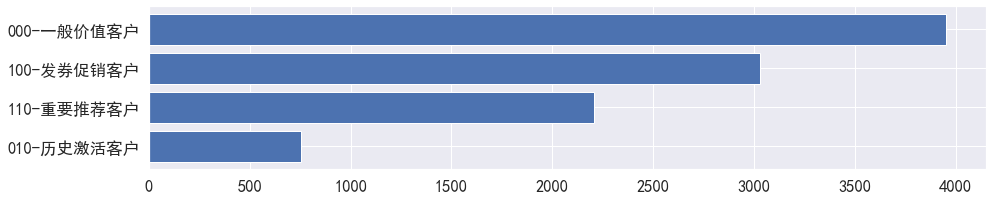

In [720]:
plt.figure(figsize=(15,3))

plt.barh(data.index,data.values)

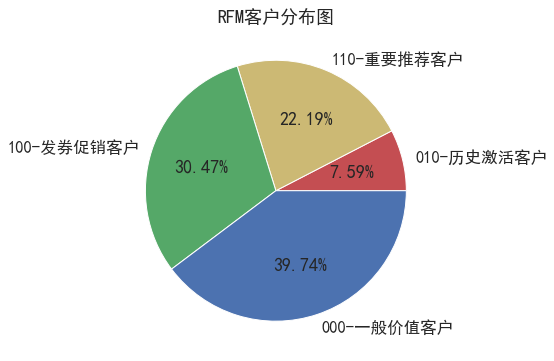

In [733]:
plt.figure(figsize=(6,6))
plt.title('RFM客户分布图')
plt.pie(data.values,autopct='%1.2f%%',labels=data.index,colors=('r', 'y', 'g', 'b'));